In [1]:
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
data_path = "/Users/hwang_1/Documents/scripts/python/ml/scripts/projects/brain_tumor/data"
images_dir = "images"

image_path = os.path.join(data_path, images_dir)

##get original image paths
images_dir_ori = "images_ori"
image_path_ori = os.path.join(data_path,images_dir_ori)

train_dir = os.path.join(image_path, "train")
val_dir = os.path.join(image_path, "val")
test_dir = os.path.join(image_path, "test")

##randomly choose 1% data for testing from both positive and negative data

##training data positive folder: train/1
##training data positive folder: train/0
train_pos_dir = os.path.join(train_dir, "1")  ##positive image folder
train_neg_dir = os.path.join(train_dir, "0")  ##negative image folder

val_pos_dir = os.path.join(val_dir, "1")
val_neg_dir = os.path.join(val_dir, "0")

##testing data positive folder: test/1
##testing data positive folder: test/0
test_pos_dir = os.path.join(test_dir, "1")
test_neg_dir = os.path.join(test_dir, "0")

##get new image paths
image_path = os.path.join(data_path,images_dir)

##list all the file names
files = os.listdir(image_path_ori)

In [3]:
files[0:10]

['Image1965.jpg',
 'Image478.jpg',
 'Image1971.jpg',
 'Image336.jpg',
 'Image3196.jpg',
 'Image450.jpg',
 'Image2288.jpg',
 'Image1781.jpg',
 'Image1959.jpg',
 'Image1795.jpg']

In [4]:
##read csv file for the information of this image dataset 
csv_file = "brain_tumor.csv"
csv_path = os.path.join(data_path, csv_file)
df = pd.read_csv(csv_path)
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [5]:
def show_image(nparray):
    fig = plt.figure(figsize = (3.0,7.0))
    ax = fig.add_subplot(111)
    ax.imshow(nparray, cmap='gray')

/Users/hwang_1/Documents/scripts/python/ml/scripts/projects/brain_tumor/data/images_ori/Image3598.jpg
image size:  (240, 240)
image id:  Image3598
label:  [0]


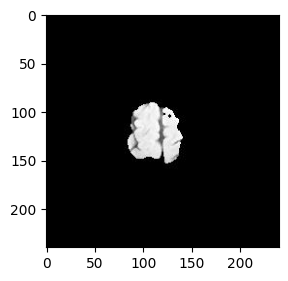

In [6]:
###Randomly show a image from the list and find its label
file_name = random.choice(files)
file_path = os.path.join(image_path_ori, file_name)
print(file_path)

##Open and then show image with Pillow
img = Image.open(file_path)
print("image size: ", img.size)
show_image(img)

##get image ID from the file name
image_id = os.path.splitext(file_name)[0]
print("image id: ", image_id)

##file the matching record from the csv file and get the label
match = df[df.Image==image_id]
print("label: ", match['Class'].tolist())

/Users/hwang_1/Documents/scripts/python/ml/scripts/projects/brain_tumor/data/images_ori/Image998.jpg
label:  [0]


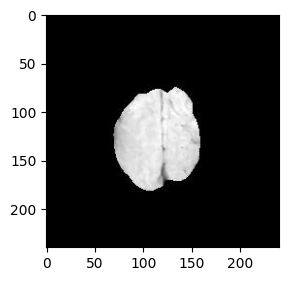

In [25]:
##show specific image with its label info
def inspect_image(path,image_name):
    image_file = image_name + ".jpg"
    file_path = os.path.join(path, image_file)
    print(file_path)
    img = Image.open(file_path)
    show_image(img)

    ##find the matching record from the csv file and get the label
    match = df[df.Image==image_name]
    print("label: ", match['Class'].tolist())
    
inspect_image(image_path_ori, "Image998")

In [8]:
from numpy import asarray
numpydata = asarray(img)
print(numpydata.shape)
print(numpydata[110:150,100:120])

(240, 240, 3)
[[[241 241 241]
  [243 243 243]
  [242 242 242]
  ...
  [ 92  92  92]
  [127 127 127]
  [135 135 135]]

 [[238 238 238]
  [242 242 242]
  [242 242 242]
  ...
  [108 108 108]
  [112 112 112]
  [135 135 135]]

 [[232 232 232]
  [238 238 238]
  [242 242 242]
  ...
  [123 123 123]
  [110 110 110]
  [125 125 125]]

 ...

 [[225 225 225]
  [207 207 207]
  [217 217 217]
  ...
  [126 126 126]
  [  0   0   0]
  [  0   0   0]]

 [[215 215 215]
  [  4   4   4]
  [  0   0   0]
  ...
  [  7   7   7]
  [  0   0   0]
  [  9   9   9]]

 [[  0   0   0]
  [  0   0   0]
  [ 10  10  10]
  ...
  [  0   0   0]
  [  5   5   5]
  [  0   0   0]]]


In [9]:
##show tensorflow version
print(tf.__version__)

2.9.0


Use image_dataset_from_directory from tf.keras.preprocessing

Link: 
https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

In [10]:
##generate a dataset from the images folder
##use labels="inferred" to get label from the folder name (0,1)
##color_mode='grayscale' will change 3 color channels to 1 channel
##the dataset is split into many small batches, batch_size specifies the number of data in each batch
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                           image_size=(240,240),
                                                           labels="inferred",
                                                           class_names=None,
                                                           label_mode="binary",
                                                           color_mode='grayscale',
                                                           batch_size=32)

Found 3386 files belonging to 2 classes.
Metal device set to: Apple M2 Max


2023-10-28 21:16:35.146275: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-28 21:16:35.146400: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(directory=val_dir,
                                                           image_size=(240,240),
                                                           labels="inferred",
                                                           class_names=None,
                                                           label_mode="binary",
                                                           color_mode='grayscale',
                                                           batch_size=32)

Found 188 files belonging to 2 classes.


In [12]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                           image_size=(240,240),
                                                           labels="inferred",
                                                           class_names=None,
                                                           label_mode="binary",
                                                           color_mode='grayscale',
                                                           batch_size=32)

Found 188 files belonging to 2 classes.


In [13]:
##normalize image data
def normalize(image,label):
    image = tf.cast(image/255.,tf.float16)
    label = tf.cast(label,tf.float16)
    return image,label

In [14]:
##normalize training data
train_data = train_data.map(normalize)

In [15]:
val_data = val_data.map(normalize)

In [16]:
test_data = test_data.map(normalize)

In [17]:
train_data

<MapDataset element_spec=(TensorSpec(shape=(None, 240, 240, 1), dtype=tf.float16, name=None), TensorSpec(shape=(None, 1), dtype=tf.float16, name=None))>

In [18]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras import Model

In [19]:
##input data
input = Input(shape=(240, 240, 1))

Dense layer
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [20]:
##build ann model
model_ann = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(240, 240, 1)),  
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_ann.output_shape

(None, 1)

In [21]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 64)                3686464   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,689,089
Trainable params: 3,689,089
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_ann.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

In [23]:
history_model_ann = model_ann.fit(train_data,
                               epochs = 30,
                               steps_per_epoch = int(len(train_data)),
                               validation_data = val_data,
                               validation_steps= int(len(val_data))
                               )

Epoch 1/30


2023-10-28 21:16:50.036934: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-10-28 21:16:50.218985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


106/106 [==============================] - 2s 19ms/step - loss: 0.5796 - accuracy: 0.7357 - val_loss: 0.4535 - val_accuracy: 0.8245
Epoch 2/30
  1/106 [..............................] - ETA: 3s - loss: 0.5335 - accuracy: 0.7500

2023-10-28 21:16:52.283710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


106/106 [==============================] - 2s 18ms/step - loss: 0.4520 - accuracy: 0.7933 - val_loss: 0.3968 - val_accuracy: 0.8245
Epoch 3/30
106/106 [==============================] - 2s 18ms/step - loss: 0.4214 - accuracy: 0.8057 - val_loss: 0.3549 - val_accuracy: 0.8457
Epoch 4/30
106/106 [==============================] - 2s 18ms/step - loss: 0.3898 - accuracy: 0.8201 - val_loss: 0.4912 - val_accuracy: 0.7872
Epoch 5/30
106/106 [==============================] - 2s 18ms/step - loss: 0.3822 - accuracy: 0.8287 - val_loss: 0.4249 - val_accuracy: 0.7819
Epoch 6/30
106/106 [==============================] - 2s 18ms/step - loss: 0.3635 - accuracy: 0.8370 - val_loss: 0.2984 - val_accuracy: 0.8723
Epoch 7/30
106/106 [==============================] - 2s 18ms/step - loss: 0.3286 - accuracy: 0.8579 - val_loss: 0.3308 - val_accuracy: 0.8351
Epoch 8/30
106/106 [==============================] - 2s 18ms/step - loss: 0.3045 - accuracy: 0.8715 - val_loss: 0.2656 - val_accuracy: 0.8777
Epoch 9/30

In [31]:
history_model_ann.history

{'loss': [0.6815382838249207,
  0.43662357330322266,
  0.3869544267654419,
  0.3605130612850189,
  0.34459295868873596,
  0.31075865030288696,
  0.3091834485530853,
  0.30934280157089233,
  0.2492361217737198,
  0.22842104732990265,
  0.2498708963394165,
  0.21487154066562653,
  0.19618868827819824,
  0.16401734948158264,
  0.1364230066537857,
  0.16118961572647095,
  0.1210983619093895,
  0.14833374321460724,
  0.2224595844745636,
  0.09481155127286911,
  0.10074310749769211,
  0.08243398368358612,
  0.17627735435962677,
  0.08096366375684738,
  0.08161133527755737],
 'accuracy': [0.7238630056381226,
  0.8018311262130737,
  0.8266391158103943,
  0.8437684774398804,
  0.8573538661003113,
  0.8638511896133423,
  0.8676905035972595,
  0.862669825553894,
  0.8989958763122559,
  0.9072652459144592,
  0.8927938938140869,
  0.9081512689590454,
  0.9190785884857178,
  0.936798632144928,
  0.9468399882316589,
  0.9385706186294556,
  0.9527466297149658,
  0.9421146512031555,
  0.916125237941741

In [32]:
def plot_graph(history):
    accuracy = history.history['accuracy']
    loss = history.history['loss']
    
    val_accuracy = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    epochs = range(0, len(history.history['loss']))
    
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, val_accuracy, label="validation_accuracy")
    plt.title = 'Accuracy'
    plt.xlabel = 'Epochs'
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, val_loss, label="validation_loss")
    plt.title = "Loss"
    plt.xlabel = "Epochs"
    plt.legend()

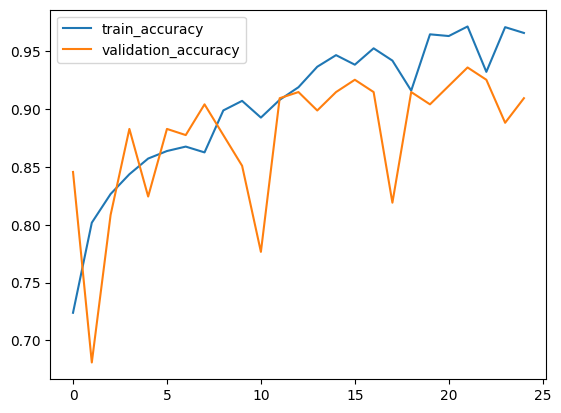

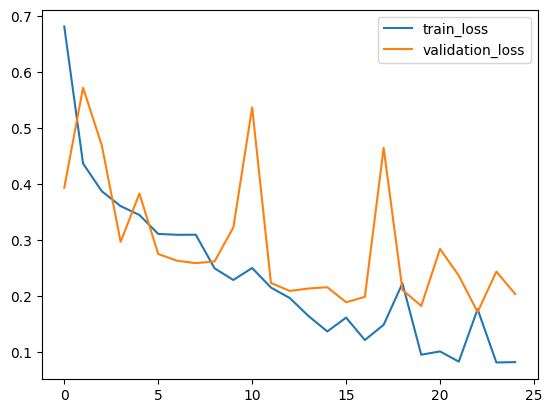

In [33]:
plot_graph(history_model_ann)

In [34]:
##Use test data to test the model
model_ann.evaluate(test_data)

6/6 [==============================] - 0s 17ms/step - loss: 0.2087 - accuracy: 0.9521


[0.20873869955539703, 0.9521276950836182]